# Download Photos

This notebook can be used to download all photos from the Unsplash dataset.

## Download a single photo

The `download_unsplash_photo` function implements th elogic to download a single photo from Unsplash. The size of the photo can be adjusted.

In [8]:
from pathlib import Path
import urllib.request

# Downloads a photo from Unsplash given its photo ID
def download_unsplash_photo(photo_id, download_path, size=640):
    photo_path = Path(download_path, photo_id + '.jpg')

    # Download only if the file is missling
    if not photo_path.exists():
        download_url = f'https://unsplash.com/photos/{photo_id}/download?w={size}'
        print(f'Downloading photo from {download_url}')

        try:
            urllib.request.urlretrieve(download_url, photo_path)
        except:
            # Sometimes the photo is deleted from the website, so the download will fail
            print(f'Cannot download {photo_id}')
            return None

    return photo_path

Call the function to download a single photo

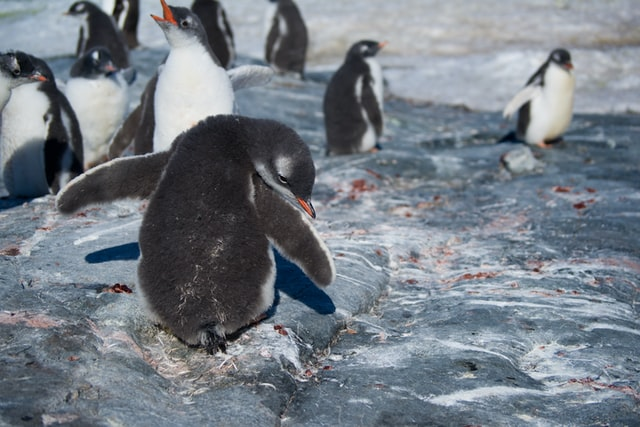

In [11]:
from IPython.display import Image

# Download the photo
photo_path = download_unsplash_photo('X8hcjl7HqSY', Path('notebooks/visualize-objects/photos'))

# Display the photo form the file
Image(filename=str(photo_path))

## Download the whole dataset

Downloading the whole dataset takes time, but we can parallelize the downloads. In this notebook the size of the photos is limited to 640px.

First, we need to load the photos metadata from the dataset. We will be using the Lite version of the dataset here, but the code should also work for the Full dataset.

In [10]:
import pandas as pd

# Read the photos table
photos = pd.read_csv(os.path.join(Path('unsplash-dataset/lite'), "photos.tsv000"), sep='\t', header=0)

# Print some stats
print(f'Photos in the dataset: {photos.shape[0]}')

Photos in the dataset: 25000


Use a multiprocessing pool to download the photos in parallel. The number of parallel threads can be adjusted.

In [ ]:
from multiprocessing import Pool

# Path where the photos will be downloaded
download_path = Path('notebooks/visualize-objects/photos')

# Wrapper function to download a photo at a specific location
def download_photo_wrapper(photo_id):
    photo_path = download_unsplash_photo(photo_id, download_path)

# Using 32 threads for parallel download
threads_count = 32
pool = Pool(threads_count)

# Start the download
pool.map(download_photo_wrapper, list(photos['photo_id']))

print('DONE!')